# Stochastic Gradient Descent Algorithm

In [16]:
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt
import random

In [17]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [18]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 0.09897669],
       [ 0.25246909],
       [ 0.20554626],
       ...,
       [-0.17155459],
       [ 0.49915514],
       [ 1.5169326 ]])

In [19]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[0.84897669],
       [1.00246909],
       [0.95554626],
       ...,
       [0.57844541],
       [1.24915514],
       [2.2669326 ]])

In [20]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[0.59881517],
       [0.74979554],
       [0.70410195],
       ...,
       [0.32928567],
       [0.97868393],
       [1.4985497 ]])

### Code below contains the parts to be edited

Imitation of formula 'x+0.75'
Weight_1:2.0269579587888367
Weight_2:2.2276882788440324
Bias:-0.6700683045315726


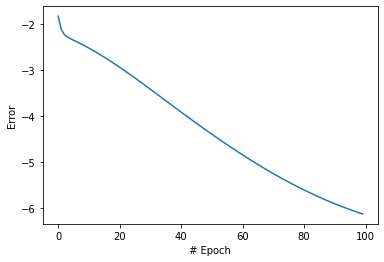

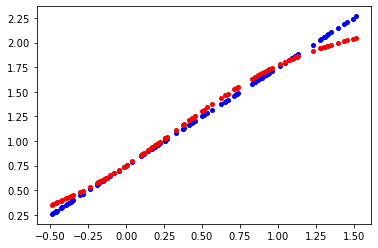

Imitation of formula 'sin(x)+0.5'
Weight_1:2.2040562785917177
Weight_2:1.5941864099486975
Bias:-0.6749237960735619


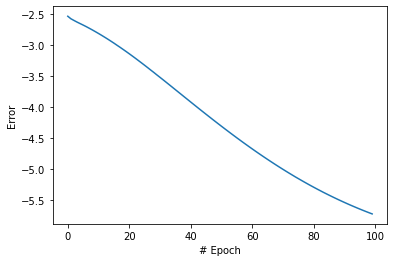

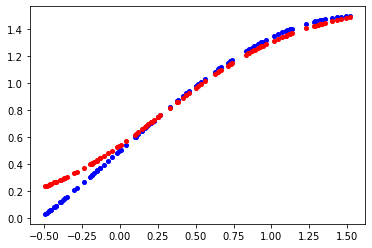

In [22]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
        #sigmoid function
    def sigmoid(self,x):
        return (1/(1 + np.exp(-x)))
    
    #derivative of sigmoid
    def der_sigmoid(self, x):
        return x * (1-x)
    
    # (a) Feed-forward pass
    def feed_forward(self):
        x = self.X
        y = self.y
        self.hidden = self.sigmoid(x*self.weight_1 + self.bias) 
        self.output = self.hidden * self.weight_2
        self.error = 0.5 *((self.y - self.output)**2)
        
    # (b) Back-propagation pass
    def back_prop(self):
         # TODO: Derivations of parameters
        de_dw2 =  -1 * (self.y - self.output) * self.hidden
        de_dw1 = -1 * (self.y - self.output) * (self.X) * self.der_sigmoid(self.hidden) 
        de_dbias = -1 * (self.y - self.output) * self.der_sigmoid(self.hidden)
         # TODO: Update the parameters with learning rate of 0.01
        lr = 0.01 #learning rate
        self.weight_2 = self.weight_2 - lr * de_dw2
        self.weight_1 = self.weight_1 - lr * de_dw1
        self.bias = self.bias - lr * de_dbias
        
#function for shuffling the data       
def shuffle_data(X, y):
    a = X
    b = y
    c = list(zip(a, b))
    random.shuffle(c)
    temp_x = []
    temp_y = []
#     print(c)
    for i in range(len(c)):
        temp_x.append(c[i][0])
        temp_y.append(c[i][1])
    return temp_x, temp_y

def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):
        error = []
        #shuffling the data
        temp_x, temp_y = shuffle_data(X, y)
        for i in range(100):
            xi = temp_x[i][0]
            yi = temp_y[i][0]
            nn.set_sample(xi,yi)
            nn.feed_forward()
            nn.back_prop()
            error.append(nn.error)
        epoch_error.append(np.mean(error))        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)